<a href="https://colab.research.google.com/github/Akhil43-design/Python/blob/master/ML_WorkShop1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
teams = pd.read_csv('/content/teams.csv')
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [17]:
teams =teams[["team","country","year","athletes","age","medals","prev_medals"]]
teams

,team,country,year,athletes,age,medals,prev_medals
0,AFG,Afghanistan,1964,8,22.0,0,0.0
1,AFG,Afghanistan,1968,5,23.2,0,0.0
2,AFG,Afghanistan,1972,8,29.0,0,0.0
3,AFG,Afghanistan,1980,11,23.6,0,0.0
4,AFG,Afghanistan,2004,5,18.6,0,0.0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0,0.0
2140,ZIM,Zimbabwe,2004,14,25.1,3,0.0
2141,ZIM,Zimbabwe,2008,16,26.1,4,3.0
2142,ZIM,Zimbabwe,2012,9,27.3,0,4.0


In [20]:
teams.head()

,team,country,year,athletes,age,medals,prev_medals
0,AFG,Afghanistan,1964,8,22.0,0,0.0
1,AFG,Afghanistan,1968,5,23.2,0,0.0
2,AFG,Afghanistan,1972,8,29.0,0,0.0
3,AFG,Afghanistan,1980,11,23.6,0,0.0
4,AFG,Afghanistan,2004,5,18.6,0,0.0


In [21]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   team         2144 non-null   object 
 1   country      2144 non-null   object 
 2   year         2144 non-null   int64  
 3   athletes     2144 non-null   int64  
 4   age          2144 non-null   float64
 5   medals       2144 non-null   int64  
 6   prev_medals  2014 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 117.4+ KB


In [34]:
teams.describe()
#teams["age"].describe()

,year,athletes,age,medals,prev_medals
count,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000
mean,1995.227408,76.329692,24.812612,10.990070,10.248759
std,15.227727,129.799427,2.758258,33.627528,31.951920
min,1964.000000,1.000000,17.000000,0.000000,0.000000
25%,1984.000000,7.000000,23.300000,0.000000,0.000000
50%,1996.000000,21.000000,24.700000,0.000000,0.000000
75%,2008.000000,74.750000,26.100000,5.000000,4.000000
max,2016.000000,839.000000,66.000000,442.000000,442.000000


**teams**

In [27]:
teams.isnull().sum()

,0
team,0
country,0
year,0
athletes,0
age,0
medals,0
prev_medals,130


In [28]:
teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,age,medals,prev_medals
19,ALB,Albania,1992,9,25.3,0,NaN
26,ALG,Algeria,1964,7,26.0,0,NaN
39,AND,Andorra,1976,3,28.3,0,NaN
50,ANG,Angola,1980,17,17.4,0,NaN
59,ANT,Antigua and Barbuda,1976,17,23.2,0,NaN
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,0,NaN
2103,YAR,North Yemen,1984,3,27.7,0,NaN
2105,YEM,Yemen,1992,8,19.6,0,NaN
2112,YMD,South Yemen,1988,5,23.6,0,NaN


In [32]:
teams = teams.dropna()

In [33]:
teams

,team,country,year,athletes,age,medals,prev_medals
0,AFG,Afghanistan,1964,8,22.0,0,0.0
1,AFG,Afghanistan,1968,5,23.2,0,0.0
2,AFG,Afghanistan,1972,8,29.0,0,0.0
3,AFG,Afghanistan,1980,11,23.6,0,0.0
4,AFG,Afghanistan,2004,5,18.6,0,0.0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0,0.0
2140,ZIM,Zimbabwe,2004,14,25.1,3,0.0
2141,ZIM,Zimbabwe,2008,16,26.1,4,3.0
2142,ZIM,Zimbabwe,2012,9,27.3,0,4.0


In [37]:
teams.corr()["medals"]

ValueError: could not convert string to float: 'AFG'

In [38]:
teams.drop(columns=['team','country']).corr()["medals"]

,medals
year,-0.034870
athletes,0.839909
age,0.023231
medals,1.000000
prev_medals,0.920048


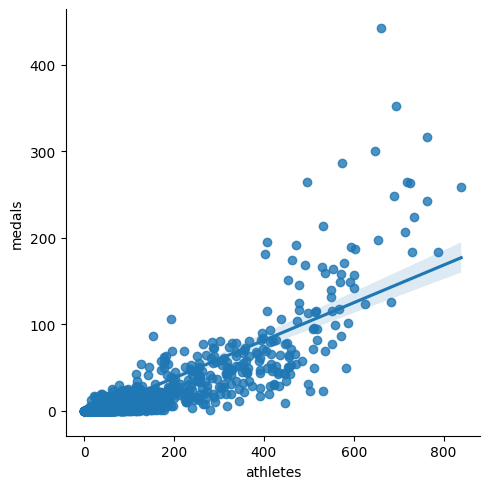

In [41]:
sns.lmplot(x="athletes",y="medals",data=teams)

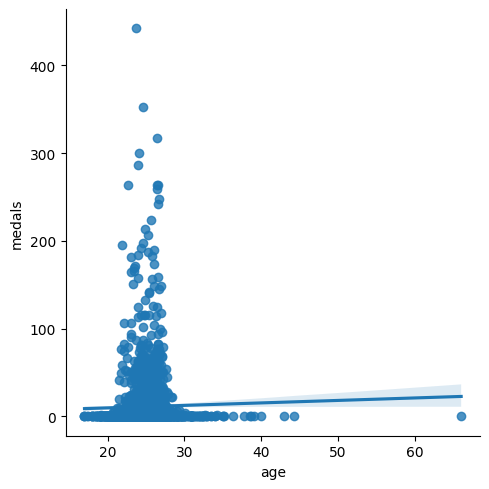

In [42]:
sns.lmplot(x="age",y="medals",data=teams)

<Axes: ylabel='Frequency'>

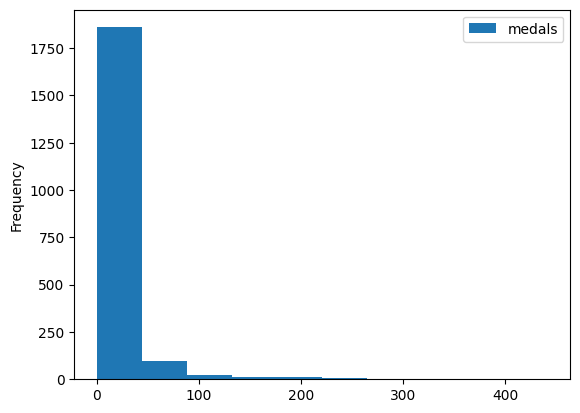

In [45]:
teams.plot.hist(y="medals")

<Axes: xlabel='country', ylabel='medals'>

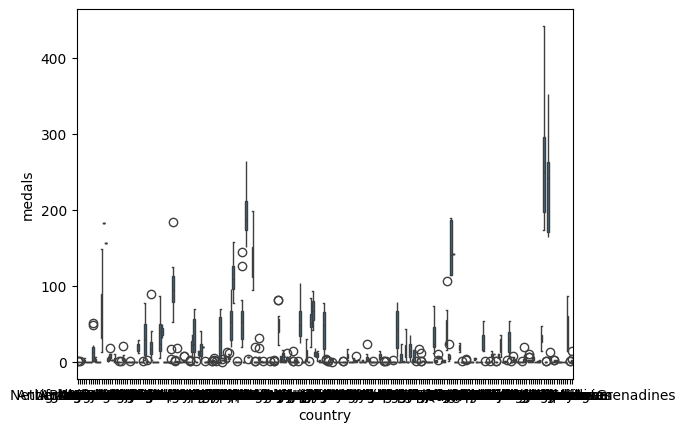

In [48]:
sns.boxplot(x = "country", y = "medals",data=teams)

In [49]:
teams["age2"] = np.log(teams["age"])

In [50]:
teams

,team,country,year,athletes,age,medals,prev_medals,age2
0,AFG,Afghanistan,1964,8,22.0,0,0.0,3.091042
1,AFG,Afghanistan,1968,5,23.2,0,0.0,3.144152
2,AFG,Afghanistan,1972,8,29.0,0,0.0,3.367296
3,AFG,Afghanistan,1980,11,23.6,0,0.0,3.161247
4,AFG,Afghanistan,2004,5,18.6,0,0.0,2.923162
...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0,0.0,3.218876
2140,ZIM,Zimbabwe,2004,14,25.1,3,0.0,3.222868
2141,ZIM,Zimbabwe,2008,16,26.1,4,3.0,3.261935
2142,ZIM,Zimbabwe,2012,9,27.3,0,4.0,3.306887


In [51]:
teams = teams.drop(columns=['age2'])

In [52]:
teams

,team,country,year,athletes,age,medals,prev_medals
0,AFG,Afghanistan,1964,8,22.0,0,0.0
1,AFG,Afghanistan,1968,5,23.2,0,0.0
2,AFG,Afghanistan,1972,8,29.0,0,0.0
3,AFG,Afghanistan,1980,11,23.6,0,0.0
4,AFG,Afghanistan,2004,5,18.6,0,0.0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0,0.0
2140,ZIM,Zimbabwe,2004,14,25.1,3,0.0
2141,ZIM,Zimbabwe,2008,16,26.1,4,3.0
2142,ZIM,Zimbabwe,2012,9,27.3,0,4.0


In [55]:
train = teams[teams["year"]<2012].copy()
test = teams[teams["year"]>=2012].copy()

In [56]:
train.shape

(1609, 7)

In [57]:
test.shape

(405, 7)

In [58]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression